In [69]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
from correction.compute import *
import fastavro
import pickle

In [71]:
#!pip install alerce
from alerce.api import AlerceAPI
client = AlerceAPI()

In [72]:
import requests

# get candid list given an object id

In [153]:
#oid = 'ZTF19aazzpje' #'ZTF20aaelulu' #'ZTF19aazzpje' # SN
#oid = 'ZTF18aaiscil' # weird
#oid = 'ZTF18abdgukn' # AGN
oid = 'ZTF18aazxcwf' # RRL
avrodir = "../data_examples/avros/%s" % oid

# get candid
params = {"oid": oid}
url = "https://ztf.alerce.online"
r = requests.post(url = "%s/get_detections" % url, json = params)
detections = r.json()["result"]["detections"]
print(detections)
candids = [s["candid_str"] for s in detections]
candids

[{'candid_str': '527209780115010003', 'oid': 'ZTF18aazxcwf', 'candid': 527209780115010003, 'mjd': 58281.2097800998, 'fid': 2, 'diffmaglim': 20.6274795532227, 'magpsf': 16.8649864196777, 'magap': 16.8778991699219, 'sigmapsf': 0.0119292195886374, 'sigmagap': 0.0168999992311001, 'ra': 242.7773031, 'dec': 2.0558861, 'sigmara': 0.09, 'sigmadec': 0.09, 'isdiffpos': -1, 'distpsnr1': 0.0399394109845161, 'sgscore1': 0.986369013786316, 'field': 481, 'rcid': 1, 'magnr': 15.7159996032715, 'sigmagnr': 0.0130000002682209, 'rb': 0.709999978542328, 'magpsf_corr': 16.1788173608258, 'magap_corr': 16.1720157761375, 'sigmapsf_corr': 0.0208952735715622, 'sigmagap_corr': 0.0216630250956621, 'has_stamps': None, 'parent_candid': None}, {'candid_str': '530273860115010001', 'oid': 'ZTF18aazxcwf', 'candid': 530273860115010001, 'mjd': 58284.2738656998, 'fid': 2, 'diffmaglim': 20.3105888366699, 'magpsf': 16.9677600860596, 'magap': 17.0258007049561, 'sigmapsf': 0.0157103128731251, 'sigmagap': 0.0238000005483627, 'r

['527209780115010003',
 '530273860115010001',
 '543291490115015011',
 '546316200115010002',
 '549173260115010006',
 '583203860115010009',
 '592147760115010001',
 '592169230115010003',
 '608133220115010004',
 '612208320115015010',
 '738545710115010006',
 '749514690115010002',
 '752524790115010003',
 '753555720115015006',
 '793396820115015005',
 '793520010115015022',
 '818480890115010010',
 '821481600115010007',
 '827461660115010009',
 '830393360115015002',
 '833358000115015006',
 '833378410115015005',
 '837252650115010006',
 '837397740115010006',
 '843462070115010005',
 '854315180115015006',
 '854355450115015006',
 '862275080115015006',
 '865273700115015003',
 '865357040115015060',
 '879314510115010022',
 '882272180115010034',
 '882314420115010031',
 '885253250115010026',
 '885294270115010019',
 '888295690115010019',
 '894229870115015002',
 '897211920115010003',
 '897274580115015007',
 '900210890115010010',
 '900298420115015002',
 '903209590115010018',
 '906230970115010009',
 '911189270

# Get avro files

In [154]:
#df = []
#if not os.path.exists(avrodir):
#    os.makedirs(avrodir)
#for candid in candids:# get avro
#    print(candid)
#    params = {"oid": oid, "candid": candid}
#    url = "http://avro.alerce.online"
#    r = requests.get(url = "%s/get_avro" % url, params = params)
#    with open("%s/%s.avro" % (avrodir, candid), 'wb') as f:
#        f.write(r.content)
##df = pd.concat(df)
##df.head()

# simulate alert stream

In [155]:
avros = sorted(os.listdir(avrodir))
avros

['1007101110115010003.avro',
 '1007109840115010001.avro',
 '1097547910115010011.avro',
 '1100569180115010020.avro',
 '1122541220115010018.avro',
 '1122541220115020018.avro',
 '1125502380115010025.avro',
 '1125541920115010007.avro',
 '1131463190115015001.avro',
 '1134507530115015010.avro',
 '1137478720115010008.avro',
 '1140525690115010010.avro',
 '1140562460115010005.avro',
 '1145518130115015009.avro',
 '1150538120115015004.avro',
 '1157521010115010034.avro',
 '1160461160115010001.avro',
 '1163397600115015028.avro',
 '1182438500115015000.avro',
 '1185481680115015001.avro',
 '1190505370115015022.avro',
 '1199439170115010022.avro',
 '1202336260115010015.avro',
 '1202376450115010016.avro',
 '1207392840115010033.avro',
 '1207398570115010018.avro',
 '1210377390115010020.avro',
 '1210401290115010020.avro',
 '1213377070115010026.avro',
 '1213420340115010019.avro',
 '1220336090115010006.avro',
 '1220459000115015002.avro',
 '1223397700115010092.avro',
 '1226310890115010009.avro',
 '122639761011

/home/fforster/Dropbox/Work/alercebroker/lc_correction/correction/compute.py:77: RuntimeWarning: invalid value encountered in sqrt
  sigmapsf_corr_ref = np.sqrt(np.power(aux2, 2) * np.power(sigmapsf, 2) + (1 - 2 * isdiffpos) * np.power(aux1, 2) * np.power(sigmagnr, 2))/aux3


,magpsf_corr,magpsf,isdiffpos,fid,magnr,distnr,chinr,sharpnr,sgscore1,distpsnr1,stellar_o,stellar_m,corr_m,corr_d,flag
0,16.387620,16.970957,f,1,15.888,0.118913,0.986,-0.024,0.986369,0.048359,True,True,None,True,False
0,16.064998,17.118080,f,2,15.716,0.046982,0.556,-0.009,0.986369,0.186903,True,True,None,True,False
0,16.172542,17.481110,f,1,15.888,0.698191,0.986,-0.024,0.986369,0.701061,False,True,None,True,False
0,16.193164,16.838499,f,2,15.716,0.409430,0.556,-0.009,0.986369,0.343175,False,True,None,True,False
0,16.363024,17.014387,f,1,15.888,0.101945,0.986,-0.024,0.986369,0.018864,False,True,None,True,False
0,16.285134,17.172487,f,1,15.888,0.201816,0.986,-0.024,0.986369,0.171214,False,True,None,True,False
0,15.964029,17.440706,f,2,15.716,0.601861,0.556,-0.009,0.986369,0.492211,False,True,None,True,False
0,15.615322,17.248997,t,1,15.888,0.281962,0.986,-0.024,0.986369,0.197577,False,True,None,True,False
0,15.398863,16.889769,t,2,15.716,0.428277,0.556,-0.009,0.986369,0.299842,False,True,None,True,False
0,16.314931,17.107895,f,1,15.888,0.112950,0.986,-0.024,0.986369,0.120702,False,True,None,True,False


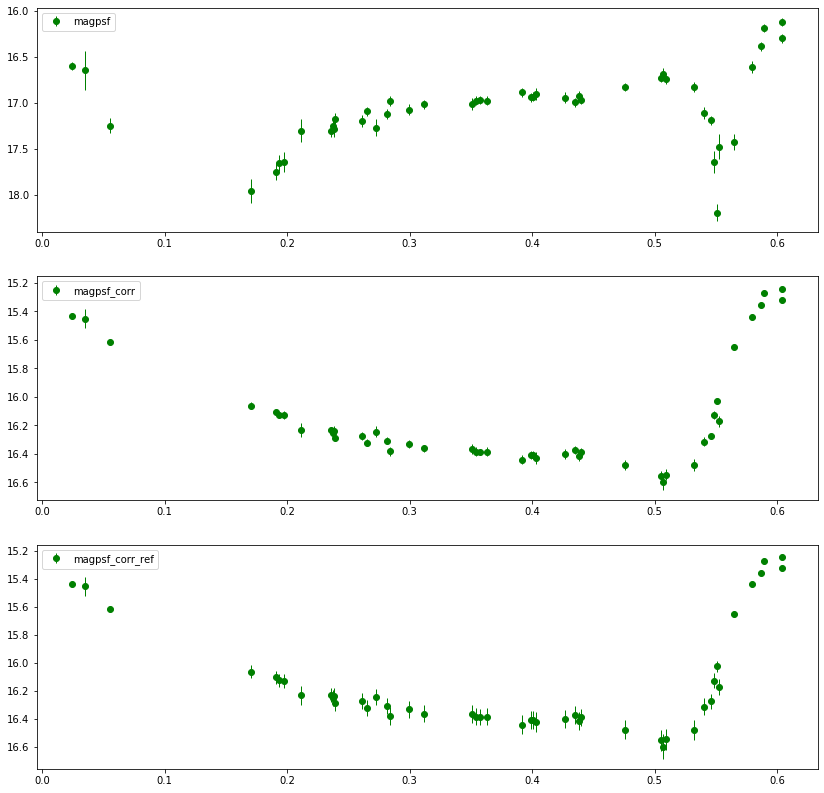

In [156]:
is_first_detection = {"object": True, 1: True, 2: True}
first_magnr = {}
df = pd.DataFrame()
colors = {1: 'g', 2: 'r'}
fig, ax = plt.subplots(nrows = 3, sharey = False, figsize=(14, 14))
for idx, avro in enumerate(avros): # = '../data_examples/avros/1184159740015015000.avro'
    with open("%s/%s" % (avrodir, avro), "rb") as f:
        try:
            reader = fastavro.reader(f)
            data = reader.next()
            skip = False
        except: 
            skip = True

    if skip:
        continue
        
    # filter
    fid = data["candidate"]["fid"]    

    # first magnr
    if is_first_detection[fid]:
        first_magnr[fid] = data["candidate"]["magnr"]
        
    # object
    stellar_object, stellar_magstats = validate_object(data["candidate"], is_first_detection[fid])
    corr_detection, corr_magstats, flag = validate_magnitudes(data["candidate"])
    magpsf_corr, sigmapsf_corr, sigmapsf_corr_ref = apply_correction(data["candidate"], first_magnr=first_magnr[fid])
    
    # selected fields for dataframe
    fields = ["fid", "magpsf", "sigmapsf", "isdiffpos", "rfid", "magnr", "distnr", "chinr", "sharpnr", "sgscore1", "distpsnr1", "jd", "ra", "dec", "field", "rcid"]
    df = df.append(pd.DataFrame(data = [[oid, candid] + [magpsf_corr, sigmapsf_corr, sigmapsf_corr_ref] + [data['candidate'][field] for field in fields]  + [stellar_object, stellar_magstats] + [corr_detection, corr_magstats, flag]],
                            columns=[["oid", "candid"] + ["magpsf_corr", "sigmapsf_corr", "sigmapsf_corr_ref"] + fields][0]  + ["stellar_o", "stellar_m"] + ["corr_d", "corr_m", "flag"]))
   
    if idx == 0:
        client.plot_stamp(oid, candid)
    
    is_first_detection["object"] = False
    is_first_detection[fid] = False

# plot
for fid in df.fid.unique():
    if fid == 2:
        continue
    mask = (df.fid == fid) & (df.sigmapsf < 1) & (df.sigmapsf_corr < 1) & (df.sigmapsf_corr_ref < 1)
    color = colors[fid]

    if oid == 'ZTF18aazxcwf':
        period = 0.614515
        ax[0].errorbar(np.mod(df.loc[mask].jd, period), df.loc[mask].magpsf, yerr=df.loc[mask].sigmapsf, c=color, marker='o', lw=0, elinewidth=1, alpha=1, label="magpsf")
        ax[1].errorbar(np.mod(df.loc[mask].jd, period), df.loc[mask].magpsf_corr, yerr=df.loc[mask].sigmapsf_corr, c=color, marker='o', lw=0, elinewidth=1, alpha=1, label="magpsf_corr")
        ax[2].errorbar(np.mod(df.loc[mask].jd, period), df.loc[mask].magpsf_corr, yerr=df.loc[mask].sigmapsf_corr_ref, c=color, marker='o', lw=0, elinewidth=1, alpha=1, label="magpsf_corr_ref")
    else:
        ax[0].errorbar(np.mod(df.loc[mask].jd, period), df.loc[mask].magpsf, yerr=df.loc[mask].sigmapsf, c=color, marker='o', lw=0, elinewidth=1, alpha=1, label="magpsf")
        ax[1].errorbar(np.mod(df.loc[mask].jd, period), df.loc[mask].magpsf_corr, yerr=df.loc[mask].sigmapsf_corr, c=color, marker='o', lw=0, elinewidth=1, alpha=1, label="magpsf_corr")
        ax[2].errorbar(np.mod(df.loc[mask].jd, period), df.loc[mask].magpsf_corr, yerr=df.loc[mask].sigmapsf_corr_ref, c=color, marker='o', lw=0, elinewidth=1, alpha=1, label="magpsf_corr_ref")

pd.options.display.max_rows = 999
display(df[["magpsf_corr", "magpsf", "isdiffpos", "fid", "magnr", "distnr", "chinr", "sharpnr", "sgscore1", "distpsnr1", "stellar_o", "stellar_m", "corr_m", "corr_d", "flag"]])

for i in range(3):
    ax[i].set_ylim(ax[i].get_ylim()[::-1])
    ax[i].legend()

In [13]:
b = get_prv_candidates(data, lc)

In [14]:
b

({'detections': [],
  'non_detections': [{'mjd': 58909.1140509001,
    'fid': 2,
    'diffmaglim': 19.5543994903564,
    'oid': 'ZTF20aatvpww',
    'datetime': datetime.datetime(2020, 3, 1, 2, 44, 13, 997768)},
   {'mjd': 58909.2076968001,
    'fid': 1,
    'diffmaglim': 19.6940002441406,
    'oid': 'ZTF20aatvpww',
    'datetime': datetime.datetime(2020, 3, 1, 4, 59, 5, 3530)},
   {'mjd': 58909.2128009,
    'fid': 1,
    'diffmaglim': 20.1035995483398,
    'oid': 'ZTF20aatvpww',
    'datetime': datetime.datetime(2020, 3, 1, 5, 6, 25, 997759)},
   {'mjd': 58912.1355670998,
    'fid': 1,
    'diffmaglim': 19.8756008148193,
    'oid': 'ZTF20aatvpww',
    'datetime': datetime.datetime(2020, 3, 4, 3, 15, 12, 997422)},
   {'mjd': 58912.1373958001,
    'fid': 1,
    'diffmaglim': 19.7810001373291,
    'oid': 'ZTF20aatvpww',
    'datetime': datetime.datetime(2020, 3, 4, 3, 17, 50, 997128)},
   {'mjd': 58912.1705323998,
    'fid': 2,
    'diffmaglim': 19.7973003387451,
    'oid': 'ZTF20aatvpww'